# Разделение датасета
Для обучения нейросети необходимы две выборки обучающая и валидационная. Разделим исходный датасет при помощи библиотеки `splitfolders`.

In [1]:
import splitfolders  # or import split_folders

input_folder = r'.\dataset\Forest Segmented\Forest Segmented'
output_folder = r'.\dataset\Forest Segmented\train_data'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

Copying files: 10216 files [01:15, 135.48 files/s]


Полученные разделенные файлы нужно разложить по папкам  следующим образом

In [31]:
import os
for root, dirs, files in os.walk(r'.\dataset\Forest Segmented\train_data'):
    level = root.replace(r'.\dataset\Forest Segmented', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    if len(files) == 0:
        continue

    print('{}{} files'.format(subindent, len(files)))

    train_data/
        train_image/
            train/
                3831 files
        train_mask/
            train/
                3831 files
        val_image/
            val/
                1277 files
        val_mask/
            val/
                1277 files


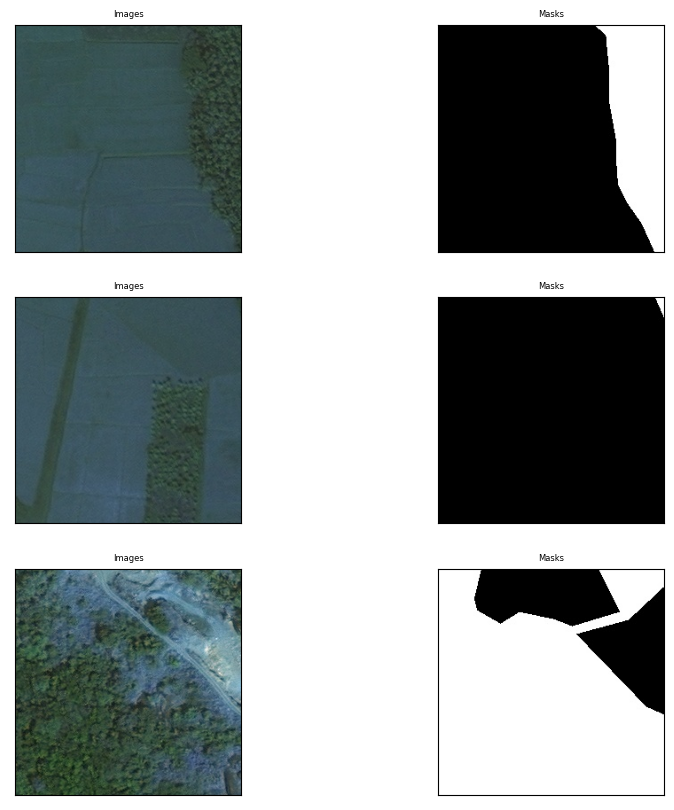

In [32]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

images_path = r'.\dataset\Forest Segmented\train_data\train_image\train'
masks_path = r'.\dataset\Forest Segmented\train_data\train_mask\train'

images_num = 3
images = sorted(os.listdir(images_path))[:images_num]
masks = sorted(os.listdir(masks_path))[:images_num]
fig, axis = plt.subplots(images_num, 2)
fig.set_figwidth(10)
fig.set_figheight(10)


for img_num in range(images_num):   
    
    image = cv2.imread(os.path.join(images_path, images[img_num]))
    axis[img_num][0].imshow(image)
    axis[img_num][0].set_title('Images', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)

    mask = cv2.imread(os.path.join(masks_path, masks[img_num]))
    axis[img_num][1].imshow(mask)
    axis[img_num][1].set_title("Masks", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)
    
plt.show()


In [34]:
def clean_masks(mask_dir):
    mask_files = os.listdir(mask_dir)
    for mask_file in mask_files:
        mask = cv2.imread(os.path.join(mask_dir, mask_file))
        gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        gray_mask = np.where(gray_mask < 127, 0, 1)
        cv2.imwrite(os.path.join(mask_dir, os.path.splitext(mask_file)[0] + '.png'), gray_mask)
        os.remove(os.path.join(mask_dir, mask_file))


In [35]:
clean_masks(r'.\dataset\Forest Segmented\train_data\train_mask\train')
clean_masks(r'.\dataset\Forest Segmented\train_data\val_mask\val')

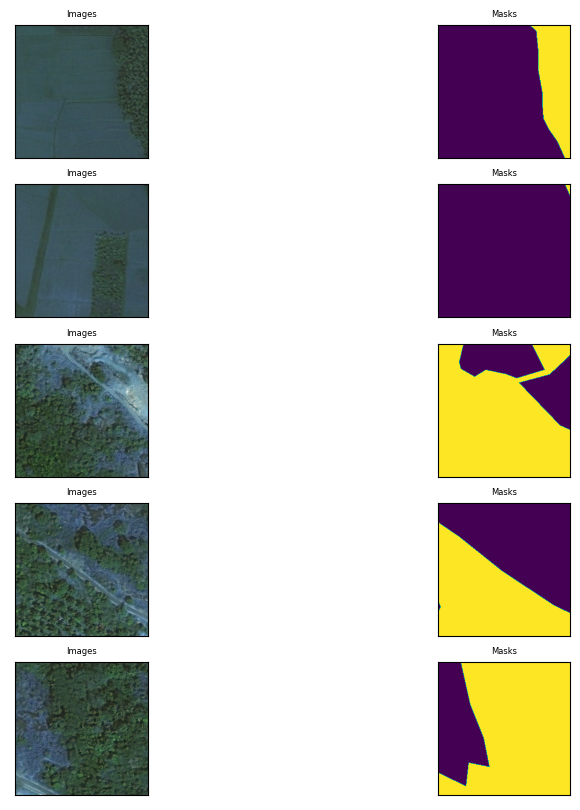

In [39]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

images_path = r'.\dataset\Forest Segmented\train_data\train_image\train'
masks_path = r'.\dataset\Forest Segmented\train_data\train_mask\train'

images_num = 5
images = sorted(os.listdir(images_path))[:images_num]
masks = sorted(os.listdir(masks_path))[:images_num]
fig, axis = plt.subplots(images_num, 2)
fig.set_figwidth(10)
fig.set_figheight(10)


for img_num in range(images_num):   
    
    image = cv2.imread(os.path.join(images_path, images[img_num]))
    axis[img_num][0].imshow(image)
    axis[img_num][0].set_title('Images', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)

    mask = cv2.imread(os.path.join(masks_path, masks[img_num]), cv2.IMREAD_GRAYSCALE)
    axis[img_num][1].imshow(mask)
    axis[img_num][1].set_title("Masks", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)
    
plt.show()